In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
df = pd.read_csv("iris.csv")

df = df.rename(columns = {"5.1":"sepal_length","3.5":"sepal_width","1.4":"petal_length","0.2":"petal_width","Iris-setosa":"species"})

In [40]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [42]:
df.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [43]:
df.groupby('species').size()

species
Iris-setosa        49
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [44]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


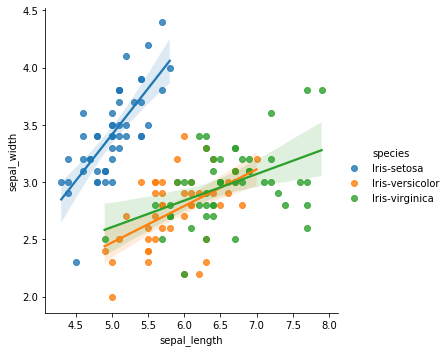

In [45]:
sns.lmplot(x="sepal_length",y="sepal_width", hue="species",data=df)

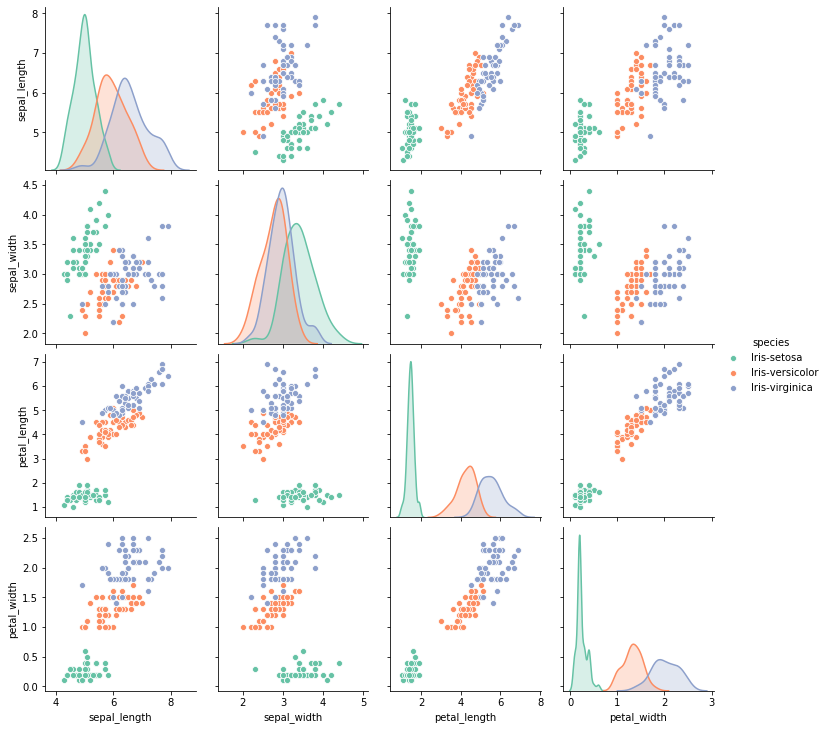

In [47]:
sns.pairplot(hue='species',data=df,palette='Set2')

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
# seperating the dependent variable from independent variable

x = df.iloc[:,:-1]
y = df.iloc[:,4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [50]:
from sklearn.svm import SVC
model = SVC()

In [51]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
pred = model.predict(x_test)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[12  0  0]
 [ 0 12  0]
 [ 0  3 18]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.80      1.00      0.89        12
 Iris-virginica       1.00      0.86      0.92        21

       accuracy                           0.93        45
      macro avg       0.93      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45

